# 0. Setup Paths

In [2]:
import os

In [3]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_tuned' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8' #name from zoo
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [4]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [5]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [6]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [7]:
!python -m pip install --upgrade pip

In [8]:
if os.name=='nt':
    !pip install wget
    import wget

In [9]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow\models'...
Updating files:  69% (2032/2935)
Updating files:  70% (2055/2935)
Updating files:  71% (2084/2935)
Updating files:  72% (2114/2935)
Updating files:  73% (2143/2935)
Updating files:  74% (2172/2935)
Updating files:  75% (2202/2935)
Updating files:  76% (2231/2935)
Updating files:  77% (2260/2935)
Updating files:  78% (2290/2935)
Updating files:  79% (2319/2935)
Updating files:  80% (2348/2935)
Updating files:  81% (2378/2935)
Updating files:  82% (2407/2935)
Updating files:  83% (2437/2935)
Updating files:  84% (2466/2935)
Updating files:  85% (2495/2935)
Updating files:  86% (2525/2935)
Updating files:  87% (2554/2935)
Updating files:  88% (2583/2935)
Updating files:  89% (2613/2935)
Updating files:  90% (2642/2935)
Updating files:  91% (2671/2935)
Updating files:  92% (2701/2935)
Updating files:  93% (2730/2935)
Updating files:  94% (2759/2935)
Updating files:  95% (2789/2935)
Updating files:  96% (2818/2935)
Updating files:  97% (2847/2935)
Updatin

In [10]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733

        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
creating build
creating build\lib
creating build\lib\object_detection
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_tf2.py -> build\lib\object_detec

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
error: [Errno 2] No such file or directory: 'c:\\users\\ouren\\documents\\senior_design\\tfodcourse\\tfod\\lib\\site-packages\\tensorflow-2.7.0-py3.9-win-amd64.egg\\tensorflow\\include\\external\\cudnn_frontend_archive\\_virtual_includes\\cudnn_frontend\\third_party\\cudnn_frontend\\include\\cudnn_frontend_EngineConfigGenerator.h'



copying slim\nets\nasnet\nasnet_utils.py -> build\lib\nets\nasnet
copying slim\nets\nasnet\nasnet_utils_test.py -> build\lib\nets\nasnet
copying slim\nets\nasnet\pnasnet.py -> build\lib\nets\nasnet
copying slim\nets\nasnet\pnasnet_test.py -> build\lib\nets\nasnet
copying slim\nets\nasnet\__init__.py -> build\lib\nets\nasnet
running egg_info
creating object_detection.egg-info
writing object_detection.egg-info\PKG-INFO
writing dependency_links to object_detection.egg-info\dependency_links.txt
writing requirements to object_detection.egg-info\requires.txt
writing top-level names to object_detection.egg-info\top_level.txt
writing manifest file 'object_detection.egg-info\SOURCES.txt'
reading manifest file 'object_detection.egg-info\SOURCES.txt'
writing manifest file 'object_detection.egg-info\SOURCES.txt'
running install
running bdist_egg
running egg_info
writing object_detection.egg-info\PKG-INFO
writing dependency_links to object_detection.egg-info\dependency_links.txt
writing requiremen

Obtaining file:///C:/Users/ouren/Documents/Senior_Design/TFODCourse/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for slim


In [11]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2021-12-05 18:55:39.983393: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/api/keras/optimizers
Traceback (most recent call last):
  File "C:\Users\ouren\Documents\Senior_Design\TFODCourse\Tensorflow\models\research\object_detection\builders\model_builder_tf2_test.py", line 25, in <module>
    from object_detection.builders import model_builder
  File "C:\Users\ouren\Documents\Senior_Design\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\builders\model_builder.py", line 25, in <module>
    from object_detection.builders import box_predictor_builder
  File "C:\Users\ouren\Documents\Senior_Design\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\builders\box_predictor_builder.py", line 20, in <module>
    from object_detection.predictors import convolutional_box_predictor
  File "C:\Users\ouren\Documents\Senior_Design\TFODCourse\tfod\lib\site-packages\o

In [12]:
!pip install tensorflow --upgrade

  Using cached tensorflow-2.7.0-cp39-cp39-win_amd64.whl (430.8 MB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


In [13]:
!pip install pyyaml

In [15]:
#sometimes uninstall and reinstall
!pip uninstall protobuf matplotlib -y 
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.19.1
Uninstalling protobuf-3.19.1:
  Successfully uninstalled protobuf-3.19.1


  Using cached protobuf-3.19.1-cp39-cp39-win_amd64.whl (895 kB)
  Using cached matplotlib-3.2.0.tar.gz (40.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.3.2-cp39-cp39-win_amd64.whl (52 kB)
  Running setup.py clean for matplotlib
Failed to build matplotlib
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\ouren\documents\senior_design\tfodcourse\tfod\scripts\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Public\\Documents\\Wondershare\\CreatorTemp\\pip-install-sw56xpq0\\matplotlib_801aee0585fb43e787a8eade9168cbcd\\setup.py'"'"'; __file__='"'"'C:\\Users\\Public\\Documents\\Wondershare\\CreatorTemp\\pip-install-sw56xpq0\\matplotlib_801aee0585fb43e787a8eade9168cbcd\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Public\Documents\Wondershare\CreatorTemp\pip-wheel-htdw2uoo'
       cwd: C:\Users\Public\Documents\Wondershare\CreatorTemp\pip-install-sw56xpq0\matplotlib_801aee0585fb43e787a8eade9168cbcd\
  Complete output (583 lines):
  

In [14]:
import object_detection

In [33]:
!pip list #find tensdorflow version for CUDA/ CUDnn tf 2.6.0

Package             Version Editable project location
------------------- ------- ---------------------------------------------------------------------------------
absl-py             0.15.0
argon2-cffi         20.1.0
async-generator     1.10
attrs               21.2.0
backcall            0.2.0
bleach              3.3.0
cffi                1.14.5
charset-normalizer  2.0.7
colorama            0.4.4
cycler              0.10.0
decorator           5.0.9
defusedxml          0.7.1
entrypoints         0.3
idna                3.3
ipykernel           5.5.5
ipython             7.23.1
ipython-genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
Jinja2              3.0.1
joblib              1.0.1
jsonschema          3.2.0
jupyter             1.0.0
jupyter-client      6.1.12
jupyter-console     6.4.0
jupyter-core        4.7.1
jupyterlab-pygments 0.1.2
jupyterlab-widgets  1.0.0
kiwisolver          1.3.1
lvis                0.5.3
MarkupSafe          2.0.1
matplotlib-inline   0.1.2
m

In [15]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt': #DOWNLOAD MODEL
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

 16% [...........                                                             ]  3358720 / 20515344

 40% [.............................                                           ]  8298496 / 20515344

 63% [.............................................                           ] 13082624 / 20515344

 87% [...............................................................         ] 18014208 / 20515344

100% [........................................................................] 20515344 / 20515344

        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [11]:
# labels = [{'name':'person_1', 'id':1}, {'name':'person_2', 'id':2}, {'name':'person_3', 'id':3}, {'name':'person_4', 'id':4}, {'name':'person_5', 'id':5},
#           {'name':'person_6', 'id':6}, {'name':'person_7', 'id':7}, {'name':'yellow_ball', 'id':8}, {'name':'green_ball', 'id':9}, {'name':'red_ball', 'id':10}]

# with open(files['LABELMAP'], 'w') as f:
#     for label in labels:
#         f.write('item { \n')
#         f.write('\tname:\'{}\'\n'.format(label['name']))
#         f.write('\tid:{}\n'.format(label['id']))
#         f.write('}\n')

In [16]:
labels = [{'name':'mask_on', 'id':1}, {'name':'mask_off', 'id':2}, {'name':'incorrect_mask', 'id':3}]
         

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [17]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'masks')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [18]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow\scripts'...


In [19]:
!pip install pytz

In [20]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [136]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [123]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [129]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [130]:
config

{'model': ssd {
   num_classes: 10
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [114]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [115]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 2
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.tfrecord')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.tfrecord')]

In [127]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [134]:
config


{'model': ssd {
   num_classes: 10
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

# 6. Train the model

In [131]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [132]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=3500".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [133]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_tuned\pipeline.config --num_train_steps=3500


In [43]:
!{command}

2021-10-30 18:43:03.311207: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-30 18:43:03.765311: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2151 MB memory:  -> device: 0, name: GeForce GTX 1650 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1030 18:43:03.869064 22348 mirrored_strategy.py:369] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 3500
I1030 18:43:03.873064 22348 config_util.py:552] Maybe overwriting train_steps: 3500
INFO

In [133]:
!pip install matplotlib_inline

  Using cached matplotlib_inline-0.1.3-py3-none-any.whl (8.2 kB)
  Using cached traitlets-5.1.0-py3-none-any.whl (101 kB)


In [71]:
!pip install tensorflow-addons==0.14.0

In [ ]:
!pip install gin--config

In [28]:
!pip uninstall pycocotools -y
!pip install pycocotools

Found existing installation: pycocotools 2.0.2
Uninstalling pycocotools-2.0.2:
  Successfully uninstalled pycocotools-2.0.2
  Using cached pycocotools-2.0.2-cp39-cp39-win_amd64.whl


# 7. Evaluate the Model

In [44]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [45]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())



[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5920475255947910737
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2255906407
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11398138140805525808
physical_device_desc: "device: 0, name: GeForce GTX 1650 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [46]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_tuned\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned


In [46]:
!{command}

Traceback (most recent call last):
  File "C:\Users\ouren\Documents\Senior Design\TFODCourse\Tensorflow\models\research\object_detection\model_main_tf2.py", line 32, in <module>
    from object_detection import model_lib_v2
  File "C:\Users\ouren\Documents\Senior Design\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\model_lib_v2.py", line 29, in <module>
    from object_detection import eval_util
  File "C:\Users\ouren\Documents\Senior Design\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\eval_util.py", line 36, in <module>
    from object_detection.metrics import lvis_evaluation
  File "C:\Users\ouren\Documents\Senior Design\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\metrics\lvis_evaluation.py", line 23, in <module>
    from lvis import results as lvis_results
  File "C:\Users\ouren\Documents\Senior Design\TFODCourse\tfod\lib\site-packages\lvis-0.5.3-py3.9.egg\lvis\__init__.py"

# 8. Load Train Model From Checkpoint

In [103]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [61]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'LPCV_ckpt-4')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [62]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [63]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [64]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Screenshot 2021-10-18 095902.jpg')

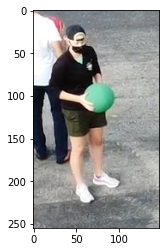

In [66]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.6,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

## Inference from Video File

In [67]:
def detect_image(img):
  image_np = np.array(img)

  input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
  detections = detect_fn(input_tensor)

  num_detections = int(detections.pop('num_detections'))
  detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}
  detections['num_detections'] = num_detections

  # detection_classes should be ints.
  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

  label_id_offset = 1
  image_np_with_detections = image_np.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
              image_np_with_detections,
              detections['detection_boxes'],
              detections['detection_classes']+label_id_offset,
              detections['detection_scores'],
              category_index,
              use_normalized_coordinates=True,
              max_boxes_to_draw=5,
              min_score_thresh=.8,
              agnostic_mode=False)
  plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
  plt.show()
  return image_np_with_detections

In [43]:
def detect_video(video):
   
    video_path = os.path.join(video)
    camera = cv2.VideoCapture(video_path)
    #camera = cv2.VideoCapture(0)
    cv2.namedWindow("detection", cv2.WINDOW_AUTOSIZE)

    # Prepare for saving the detected video
    sz = (int(camera.get(cv2.CAP_PROP_FRAME_WIDTH)),
          int(camera.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    fourcc = cv2.VideoWriter_fourcc(*'mpeg')

    vout = cv2.VideoWriter()
    vout.open(os.path.join("videos", "res", video), fourcc, 3, sz, True)
    
    skip = False
    count = 0
    while True:
        if(skip==False):
            res, frame = camera.read()
            if not res:
                break
            print('has res')
            image = detect_image(frame)
            # im = Image.fromarray(frame)
            # image = detect_image(im, yolo, all_classes)
        cv2.imshow('detection',image)

        # Save the video frame by frame
        vout.write(image)

        if cv2.waitKey(110) & 0xff == 47:
                break
        count = count+1
        if(count%2==0): #splitting original FPS in half
            skip=True
        else:
            skip=False

In [16]:
video = "C:/Users/ouren/Documents/Senior Design/TFODCourse/LPCV Data/HarderVideo/7p3b_02M.mp4"

#detect_video(video)


# 10. Real Time Detections from your Webcam

In [75]:
!pip uninstall opencv-python-headless -y 

In [78]:
!pip uninstall opencv-python
!pip install opencv-python

^C


In [84]:
cap = cv2.VideoCapture(video)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

KeyboardInterrupt: 

# 10. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')